## Principle Component Analysis
@Ram Vempati

### What is Principle Component Analysis?

Principle Component Analysis also known as PCA is one of the most broadly used of unsupervised algorithms. 

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization,
for noise filtering, for feature extraction and engineering, and much more.

### How does PCA work?

PCA helps us to identify patterns in data based on the correlation between features. PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer
dimensions than the original one. 

The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other,

### Steps in algorithm

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace ( k less than or equal to d ).
6. Construct a projection matrix W from the "top" k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

### Example - 1

Let us start with a simple dataset; the Iris data whcih is available in scikit-learn. The data consists of measurements of three different species of irises. namely 

1. Iris Virginica 
2. Iris Setosa 
3. Iris Versicolor

In [1]:
from sklearn.datasets import load_iris 

iris = load_iris() 

#checking to see what datasets are available in iris 
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
# check the shape of data
print(iris.data.shape)

# check the feature names
print(iris.feature_names)

# check target values 
print(iris.target_names)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
# one can directly do PCA on original data
# but we will create a dataframe with the data and then do PCA

import pandas as pd

# making a dataframe from array
iris_dataframe = pd.DataFrame.from_records(iris.data)

# assigning column names to the dataframe
iris_dataframe.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# add the target variable to the dataframe
iris_dataframe['species'] = iris.target

# print the top 5 rows of dataframe
iris_dataframe.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# PCA with 2 components.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [5]:
#Fitting PCA to the iris dataset and transforming it into 2 principal components
X, y = iris_dataframe.iloc[:, 0:4].values, iris_dataframe.iloc[:, 4].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

X_proj = pca.fit_transform(X_std)
print(X_proj.shape)

(150, 2)


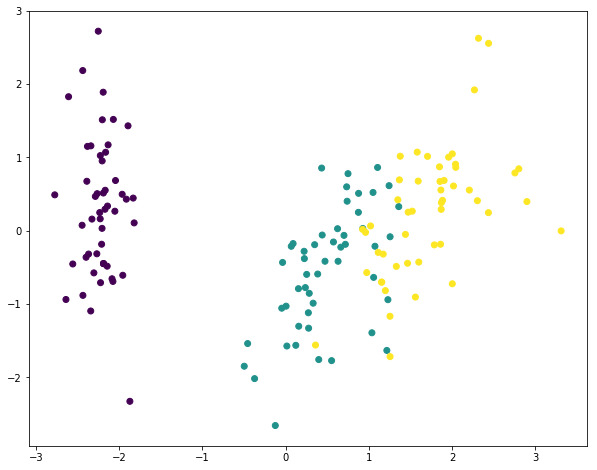

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Plotting the projected principal components and try to understand the data. 
# c=y colors the scatter plot based on y (target)
plt.figure(figsize = (10,8))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.show()

### Look into details of PCA object

we will look into two important elements of PCA objects

1. pca.components_

pca.components_ has the meaning of each principal component, essentially how it was derived. Checking shape tells us it has 2 rows, one for each principal component and 4 columns, proportion of each of the 4 features for each row

2. pca.explained_variance_ratio

this tells us the extent to which each component explains the original dataset. The 1st component is able to explain ~72% of X and the second only about 23%. Together they can explain about 95% of the variance of X

In [7]:
print(pca.components_)
print(pca.components_.shape)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]
(2, 4)


In [8]:
# Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))

Meaning of the 2 components:
0.52 x sepal length (cm) + -0.26 x sepal width (cm) + 0.58 x petal length (cm) + 0.57 x petal width (cm)
0.37 x sepal length (cm) + 0.93 x sepal width (cm) + 0.02 x petal length (cm) + 0.07 x petal width (cm)


In [9]:
print(pca.explained_variance_ratio_)

[ 0.72770452  0.23030523]


In [10]:
# So if we only needed a 92% variance, we actually need just one component, let's verify
pca = PCA(0.92)
X_new = pca.fit_transform(X)
print(X_new.shape)

# If we need more than 98% variance, we begin to need more components
pca=PCA(0.98)
X_new = pca.fit_transform(X)
print(X_new.shape)

(150, 1)
(150, 3)


### Example - 2

We will slightly increase the complexity and look into a larger dataset which is also available in scikit-learn package. This is the dataset of handwritten digits. Let us look into dataset

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [12]:
# Print the shape of data
print(digits.data.shape) 

# Print the shape of images
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


Looking at data, there are 64 features, and in another available dataset called images there are 8X8 pixels. So, the features are nothing but a reshape of the images data 8X8 pixels thrown next to each other describing the intensity of each pixel. The imput is a set of images of digits from which we need to learn the target, which is the actual digit itself.

In [13]:
# Run PCA retaining 95% of the variance
X, y = digits.data, digits.target
pca_digits = PCA(0.95)
X_proj = pca_digits.fit_transform(X)
print(X.shape, X_proj.shape)

(1797, 64) (1797, 29)


Above tells us that we need 29 principal components to explain 95% of the original dataset which consists of 64 features

In [14]:
# Let's run PCA with 2 components so as to plot the data in 2D
pca_digits = PCA(2)
X_proj = pca_digits.fit_transform(X)
print(np.sum(pca_digits.explained_variance_ratio_))

0.285093648237


As you can see above we only retain about 28% of the variance by choosing 2 components

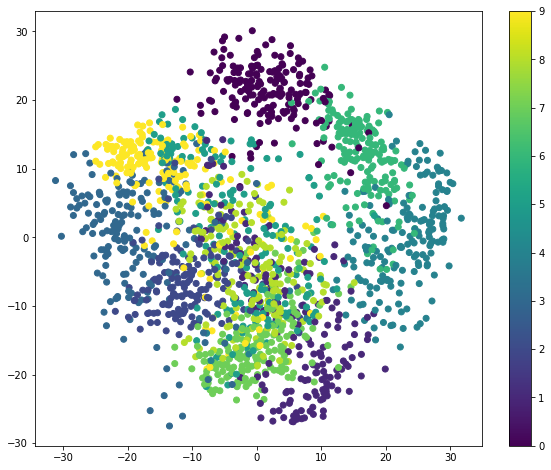

In [15]:
#Let's plot the principal components as a scatter plot
plt.figure(figsize = (10,8))
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.colorbar()
plt.show()

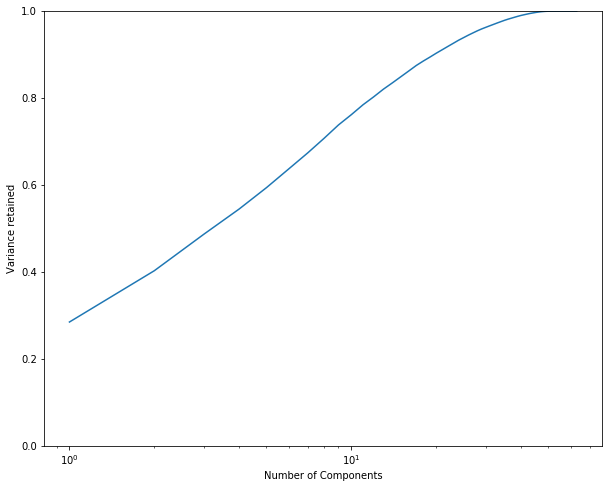

In [16]:
#Lets try and plot number of components versus explained variance ratio as a cumulative sum
pca_digits = PCA(64).fit(X)
plt.figure(figsize = (10,8))
plt.semilogx(np.cumsum(pca_digits.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance retained')
plt.ylim(0,1)
plt.show()

### Example - 3

Let's try and compress a facial image dataset using PCA. Going to use the Olivetti face image dataset, again available in scikit-learn. Would like to reduce the original dataset using PCA, essentially compressing the images and see how the compressed images turn out by visualizing them.

Before using PCA, let us try and understand as well as display the original images. Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.

In [17]:
from sklearn.datasets import fetch_olivetti_faces
oliv = fetch_olivetti_faces()
print(oliv.keys())
print(oliv.data.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 4096)


There are 400 images with 64X64 (4096) pixels each.

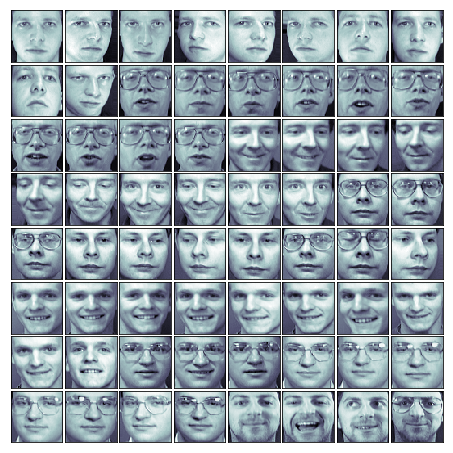

In [18]:
#Setup a figure 6 inches by 6 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

In [19]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
X, y = oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print(X_proj.shape)

(400, 64)


In [20]:
print(np.cumsum(pca_oliv.explained_variance_ratio_))

[ 0.23812692  0.37806678  0.45775288  0.50773615  0.54383463  0.57540399
  0.59967232  0.6200363   0.63961744  0.65633863  0.67229086  0.68666065
  0.69912803  0.71059936  0.72122812  0.73100531  0.74019593  0.74835169
  0.75589043  0.76336026  0.77034605  0.7764923   0.78233159  0.78802884
  0.79349077  0.79880929  0.80394745  0.80890584  0.81348246  0.81789422
  0.8219142   0.82575595  0.82937539  0.83272058  0.83592421  0.83908421
  0.84213531  0.8451215   0.84794247  0.85068172  0.85327893  0.85581738
  0.85826099  0.86065698  0.86296034  0.86521995  0.86743861  0.86963481
  0.87171942  0.87376648  0.8757323   0.87763929  0.87947577  0.88124323
  0.88299698  0.88469505  0.88635629  0.88797307  0.88957584  0.89113444
  0.89266342  0.89415163  0.89561999  0.89706051]


Above is not bad at all. It says that we are able to retain 89.7% of variance by reducing number of features down by 64 times.

Let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the 64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images back to 64x64 dimension. 

Note that we're not reverting back to the original data, we're simply going back to the actual dimension of the original images so we can visualize them.

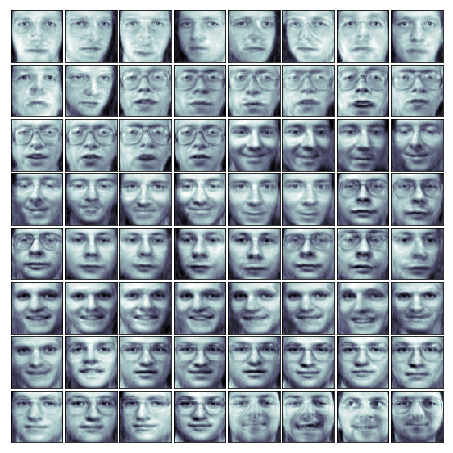

In [21]:
X_inv_proj = pca_oliv.inverse_transform(X_proj)

#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))

#Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 dimension but 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')
    
plt.show()

As you can see the images look comparable to original ones but few details are missing. However the advantage we gained in this is to reduce the dimensionality by 64 times which helps significantly in our analysis.

### Tip:

When performing PCA, it is typically a good idea to normalize the data first. Because PCA seeks to identify the principal components with the highest variance, if the data are not properly normalized, attributes with large values and large variances (in absolute terms) will end up dominating the first principal component when they should not. Normalizing the data gets each attribute onto more or less the same scale, so that each attribute has an opportunity to contribute to the principal component analysis.